In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('BarkVN-50_mendeley/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
# Imports needed
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
img_height = 360
img_width = 360
batch_size = 32

In [19]:
import pathlib

In [20]:
import PIL
import PIL.Image

In [21]:
data_dir = pathlib.Path("BarkVN-50_mendeley/")

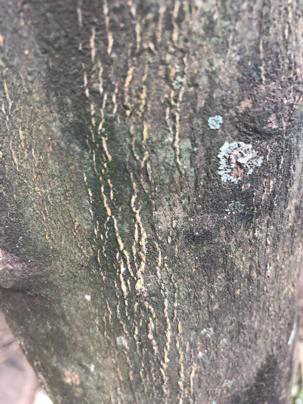

In [23]:
Citrus_grandis = list(data_dir.glob('Citrus grandis/*'))
PIL.Image.open(str(Citrus_grandis[0]))

### Model Building

In [24]:
model = keras.Sequential(
    [
        layers.Input((img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(50),
    ]
)

In [10]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "BarkVN-50/BarkVN-50_mendeley/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training")

Found 5578 files belonging to 50 classes.
Using 5021 files for training.


In [11]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "BarkVN-50/BarkVN-50_mendeley/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation")

Found 5578 files belonging to 50 classes.
Using 557 files for validation.


In [14]:
class_names = ds_train.class_names
print(class_names)

['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis', 'Artocarpus heterophyllus', 'Barringtonia acutangula', 'Cananga odorata', 'Carica papaya', 'Casuarina equisetifolia', 'Cedrus', 'Chrysophyllum cainino', 'Citrus aurantiifolia', 'Citrus grandis', 'Cocos nucifera', 'Dalbergia oliveri', 'Delonix regia', 'Dipterocarpus alatus', 'Erythrina fusca', 'Eucalyptus', 'Ficus microcarpa', 'Ficus racemosa', 'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Hopea', 'Khaya senegalensis', 'Khaya senegalensis A.Juss', 'Lagerstroemia speciosa', 'Magnolia alba', 'Mangifera', 'Melaleuca', 'Melia azedarach', 'Musa', 'Nephelium lappaceum', 'Persea', 'Polyalthia longifolia', 'Prunnus', 'Prunus salicina', 'Psidium guajava', 'Pterocarpus macrocarpus', 'Senna siamea', 'Spondias mombin L', 'Syzygium nervosum', 'Tamarindus indica', 'Tectona grandis', 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia', 'Wrightia religiosa']


In [15]:
dict_labels = dict(zip(class_names, list(range(len(class_names)))))
dict_labels

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [16]:
import cv2

In [22]:
from tqdm import tqdm
from PIL import Image
from sklearn.utils import shuffle

In [20]:
def dataset(path): #put path till the highest directory level
    images = []
    labels = []
    for folder in tqdm(os.listdir(path)):
        value_of_label = dict_labels[folder] #dict_labels is the dictionary whose key:value pairs are classes:numbers representing them

        for file in (os.listdir(os.path.join(path, folder))):
            path_of_file = os.path.join(os.path.join(path, folder), file)

            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(value_of_label)

    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels


In [23]:
images, labels = dataset('BarkVN-50/BarkVN-50_mendeley/')
images, labels = shuffle(images, labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.14it/s]


In [24]:
image_size = (224, 224)
batch_size = 64
train_datagen = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.4,
                            zoom_range = 0.4,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2)

train_ds = train_datagen.flow_from_directory('BarkVN-50/BarkVN-50_mendeley/',
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'training',
                                      color_mode="rgb",)

val_ds = train_datagen.flow_from_directory('BarkVN-50/BarkVN-50_mendeley/',
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'validation',
                                      color_mode="rgb")

Found 4483 images belonging to 50 classes.
Found 1095 images belonging to 50 classes.


In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import applications

In [31]:
vgg_base = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
vgg_base.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = vgg_base(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(50)(x)
model = keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 9s 0us/step


In [32]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
71/71 [==============================] - ETA: 0s - loss: 3.7691 - categorical_accuracy: 0.0738

KeyboardInterrupt: 

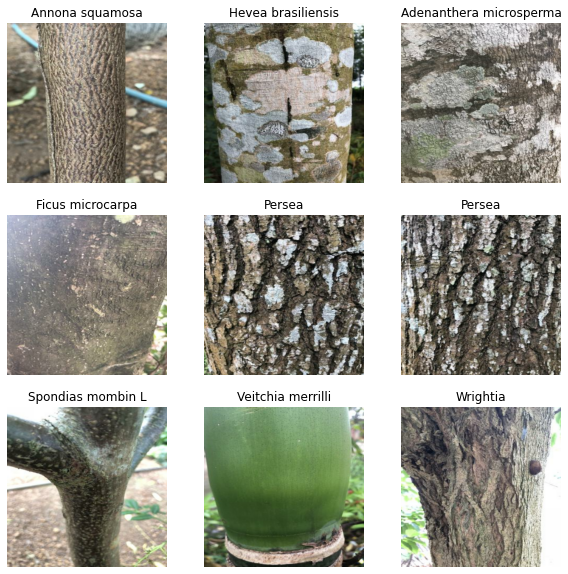

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 360, 360, 3)
(32,)


In [30]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [34]:
normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[30]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


**Configure the dataset for performance**

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_validation = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
num_classes = 50

model_1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
model_1.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

In [12]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(300,300,3))

ModuleNotFoundError: No module named 'tensorflow_hub'

In [42]:
# !pip install tensorflow_hub

In [43]:
feature_extractor_layer.trainable = False

In [44]:
# hist = model_1.fit(ds_train, epochs=10, verbose=1)

In [45]:
model_tf = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer'),
layers.Dense(50, activation='softmax', name='output')
])

ValueError: Exception encountered when calling layer "keras_layer" (type KerasLayer).

in user code:

    File "C:\Users\RIZWAN\anaconda3\lib\site-packages\tensorflow_hub\keras_layer.py", line 237, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * <tf.Tensor 'inputs:0' shape=(None, 300, 300, 3) dtype=float32>
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


Call arguments received by layer "keras_layer" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 300, 300, 3), dtype=float32)
  • training=None

In [ ]:
# import tensorflow_hub as hub

# feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
# feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
#                                          input_shape=(300,300,3))

In [ ]:
import shutil
import os
import numpy as np
import argparse

def get_files_from_folder(path):

    files = os.listdir(path)
    return np.asarray(files)

def main(path_to_data, path_to_test_data, train_ratio):
    # get dirs
    _, dirs, _ = next(os.walk(path_to_data))

    # calculates how many train data per class
    data_counter_per_class = np.zeros((len(dirs)))
    for i in range(len(dirs)):
        path = os.path.join(path_to_data, dirs[i])
        files = get_files_from_folder(path)
        data_counter_per_class[i] = len(files)
    test_counter = np.round(data_counter_per_class * (1 - train_ratio))

    # transfers files
    for i in range(len(dirs)):
        path_to_original = os.path.join(path_to_data, dirs[i])
        path_to_save = os.path.join(path_to_test_data, dirs[i])

        #creates dir
        if not os.path.exists(path_to_save):
            os.makedirs(path_to_save)
        files = get_files_from_folder(path_to_original)
        # moves data
        for j in range(int(test_counter[i])):
            dst = os.path.join(path_to_save, files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.move(src, dst)


def parse_args():
        parser = argparse.ArgumentParser(description="Dataset divider")
        parser.add_argument("--data_path", required=True,
            help="Path to data")
        parser.add_argument("--test_data_path_to_save", required=True,
            help="Path to test data where to save")
        parser.add_argument("--train_ratio", required=True,
            help="Train ratio - 0.7 means splitting data in 70 % train and 30 % test")
          return parser.parse_args()

if __name__ == "__main__":
    
    args = parse_args()
    main(args.data_path, args.test_data_path_to_save, float(args.train_ratio))

In [ ]:
import os
import numpy as np
import shutil
import random
root_dir = 'BarkVN-50/BarkVN-50_mendeley/'
classes_dir = [str(i) for i in range(0,50)]

test_ratio = 0.20

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'test/' + cls)

src = root_dir + cls

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print("*****************************")
print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Testing: ', len(test_FileNames))
print("*****************************")


lab = ['0', '1']

for name in train_FileNames:
    for i in lab:
        shutil.copy(name, root_dir +'train/' + i)

for name in test_FileNames:
    for i in lab:
        shutil.copy(name, root_dir +'test/' + i)
print("Copying Done!")

In [1]:
classes_dir = [str(i) for i in range(0,50)]

In [2]:
classes_dir

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49']